In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

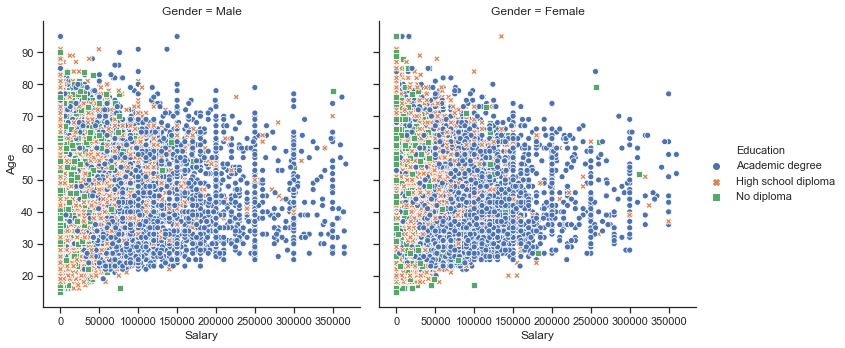

In [2]:
sns.set(style='ticks')

df = pd.read_csv('data/salary.csv')
sns.relplot(x='Salary', y='Age', hue='Education', style='Education', col='Gender', data=df)

In [2]:
df_scores = pd.read_csv('data/scores.csv')

In [3]:
df_scores.head()

,group_a,group_b,group_c,group_d
0,118,126,108,93
1,103,89,89,99
2,125,90,114,91
3,107,101,116,110
4,111,102,126,80


In [6]:
pd.melt(df_scores, value_name='IQ Score', var_name='Groups')

,Groups,IQ Score
0,group_a,118
1,group_a,103
2,group_a,125
3,group_a,107
4,group_a,111
...,...,...
395,group_d,105
396,group_d,74
397,group_d,85
398,group_d,85


In [5]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


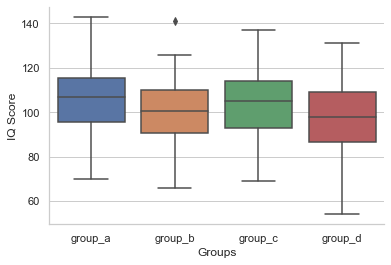

In [6]:
sns.set_style('whitegrid')
# df_scores.boxplot()
sns.boxplot(x="Groups", y="IQ Score", data=pd.melt(df_scores, value_name='IQ Score', var_name='Groups'))
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

In [7]:
df_move = pd.read_csv('data/movie_scores.csv', index_col=0)

In [8]:
df_move.head()

,MovieTitle,Tomatometer,AudienceScore
0,The Shape of Water,91,73
1,Black Panther,97,79
2,Dunkirk,92,81
3,The Martian,91,91
4,The Hobbit: An Unexpected Journey,64,83


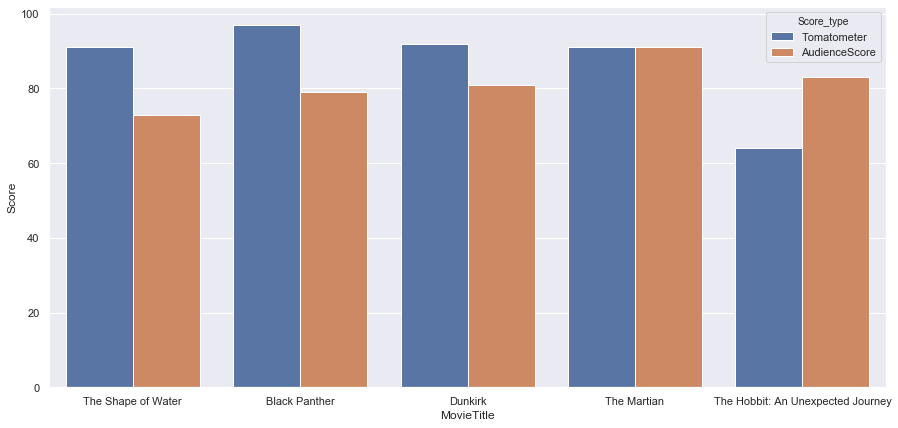

In [20]:
sns.set()
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
new_movie = pd.melt(df_move, id_vars=['MovieTitle'], value_vars=['Tomatometer', 'AudienceScore'], var_name='Score_type', value_name='Score')
sns.barplot(data=new_movie, x='MovieTitle', y='Score', hue='Score_type', ax=ax)

In [4]:
df_youtube = pd.read_csv('data/youtube.csv')

In [5]:
df_youtube.head()

,channels,subs,views
0,PewDiePie,83.1,20329
1,T-Series,82.9,61057
2,5-Minute Crafts,48.0,12061
3,Canal KondZilla,46.1,22878
4,Justin Bieber,43.1,601


          channels  Type  Number in millions
0        PewDiePie  subs                83.1
1         T-Series  subs                82.9
2  5-Minute Crafts  subs                48.0
3  Canal KondZilla  subs                46.1
4    Justin Bieber  subs                43.1


/home/chuanhao01/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


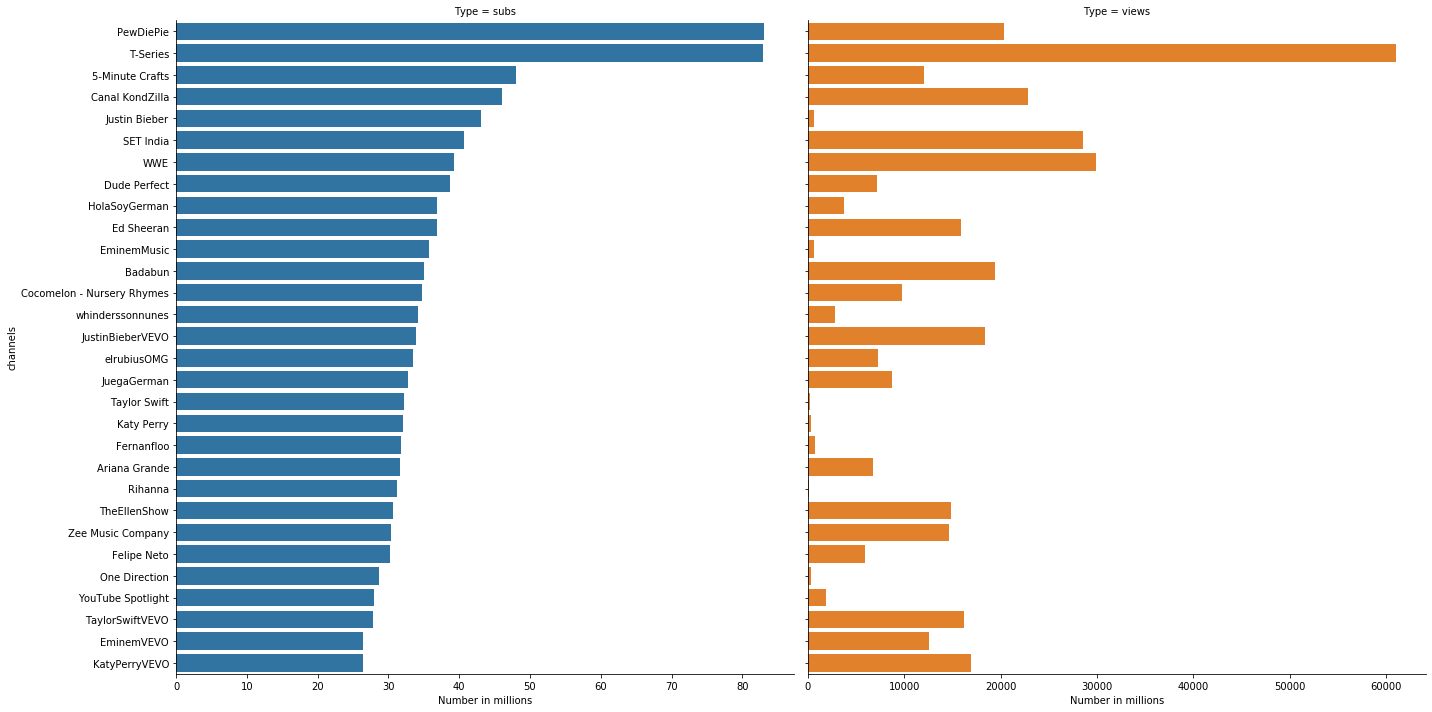

In [6]:
new_youtube = pd.melt(df_youtube, id_vars=['channels'],
                      value_vars=['subs', 'views'],
                      var_name='Type',
                      value_name='Number in millions')

print(new_youtube.head())

# fig, ax = plt.subplots(1, 1, figsize=(10, 10))

g = sns.FacetGrid(new_youtube, col='Type', hue='Type', sharex=False, height=10)
g.map(sns.barplot, 'Number in millions', 'channels')

In [2]:
df_anage = pd.read_csv('data/anage_data.csv', index_col=0)

0       False
1       False
2       False
3       False
4       False
        ...  
4214    False
4215    False
4216    False
4217    False
4218    False
Length: 4218, dtype: bool

Body mass (g)               0
Maximum longevity (yrs)    72
dtype: int64

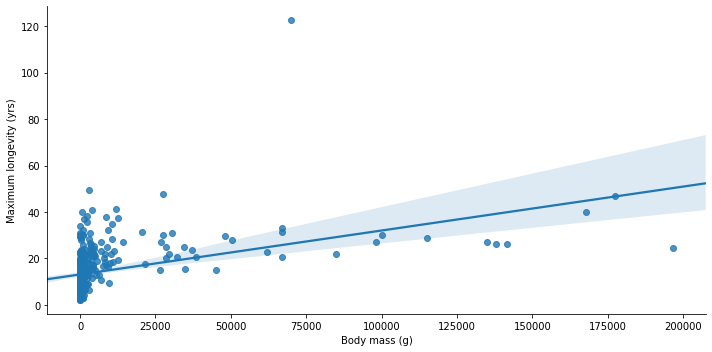

In [5]:
filter = ((df_anage['Class'] == 'Mammalia') & (df_anage['Body mass (g)'] < 200000))
display(filter)
df = df_anage[filter]
df = df[['Body mass (g)', 'Maximum longevity (yrs)']]
display(df.isnull().sum())
df = df.dropna()

sns.lmplot(x='Body mass (g)', y='Maximum longevity (yrs)', data=df, aspect=2)